In [1]:
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

scipy: 0.17.0
numpy: 1.13.1
matplotlib: 1.5.0
pandas: 0.17.1
sklearn: 0.19.1


In [2]:
!rm -f pimaIndians.csv
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data -O pimaIndians.csv

--2018-01-27 23:43:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23279 (23K) [text/plain]
Saving to: ‘pimaIndians.csv’

100%[======================================>] 23,279      --.-K/s   in 0.03s   

2018-01-27 23:43:38 (684 KB/s) - ‘pimaIndians.csv’ saved [23279/23279]



In [3]:
!rm -f housing.csv
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data -O housing.csv

--2018-01-27 23:43:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49082 (48K) [text/plain]
Saving to: ‘housing.csv’

100%[======================================>] 49,082      --.-K/s   in 0.07s   

2018-01-27 23:43:40 (729 KB/s) - ‘housing.csv’ saved [49082/49082]



In [4]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sa0d-218294071c3031-cf228a6161b9/.local/lib/python2.7/site-packages


### Chap Evaluating the performance of ML algorithms
    Classificaiton PIMA indiands
    regression boston housing data set

In [5]:
# Cross Validation Classification Accuracy
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'pimaIndians.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy:", (results.mean(), results.std()))

('Accuracy:', (0.76951469583048526, 0.048410519245671947))


In [6]:
#Logarithmic loss
#logloss
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)") % (results.mean(), results.std())

Logloss: -0.493 (0.047)


In [7]:
#Area under ROC: receiver operating characteristic
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.5f)") % (results.mean(), results.std())

AUC: 0.824 (0.04072)


In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[141  21]
 [ 41  51]]


In [9]:
from sklearn.metrics import classification_report
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

        0.0       0.77      0.87      0.82       162
        1.0       0.71      0.55      0.62        92

avg / total       0.75      0.76      0.75       254



In [10]:
# 0 and 1 is the classificaiton

## regression metrics 
    using the boston housing data set

In [13]:
#MAE mean absoliute error": cancelsout.. and hence advised to use RMSE
from sklearn.linear_model import LinearRegression
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)") % (results.mean(), results.std())

MAE: -4.005 (2.084)


In [14]:
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)") % (results.mean(), results.std())

MSE: -34.705 (45.574)


In [15]:
# R squared good ness of fit...
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)") % (results.mean(), results.std())

R^2: 0.203 (0.595)


In [16]:
# kinda bad... range is from 0 to 1.. bad to good fit..

# spot checking of Classificaiton algorithms...

linear machine learning algorithms:  
     Logistic Regression.  
     Linear Discriminant Analysis.  
       
Nonlinear machine learning algorithms:  
     k-Nearest Neighbors.  
     Naive Bayes.  
     Classiffcation and Regression Trees.  
     Support Vector Machines.  

In [17]:
filename = 'pimaIndians.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.76951469583


In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#LDA: linear discriminant analysis
kfold = KFold(n_splits=10, random_state=7)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())
#using same values and data as above

0.773462064252


In [19]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.726555023923


In [20]:
from sklearn.naive_bayes import GaussianNB
# Naive Bayes
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.75517771702


In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.686107313739


In [22]:
type(results)

numpy.ndarray

In [23]:
results[0:5]

array([ 0.63636364,  0.76623377,  0.67532468,  0.57142857,  0.63636364])

In [24]:
from sklearn.svm import SVC
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.651025290499


# Spot checking on  regression ML algos
    linear machine learning algorithms:  
    Linear Regression.  
    Ridge Regression.  
    LASSO Linear Regression.  
    Elastic Net Regression.  
      
    nonlinear machine learning algorithms:
      K-Nearest Neighbors.  
    Classiffcation and Regression Trees.  
    Support Vector Machines.  


In [25]:
from sklearn.linear_model import LinearRegression
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.7052559445


In [26]:

from sklearn.linear_model import Lasso
model = Lasso()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print(results.mean())

-34.4640845883


In [27]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-31.1645737142


In [28]:
#NON Linear classificaiton
from sklearn.neighbors import KNeighborsRegressor
 
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-107.28683898


In [29]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-35.9838815686


In [30]:
from sklearn.svm import SVR
model = SVR()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-91.0478243332


# comparing Ml algos

    The goal.. compare Ml algos consistently
        Logistic Regression.
        Linear Discriminant Analysis.
        k-Nearest Neighbors.
        ClassiFFcation and Regression Trees.
        Naive Bayes.
        Support Vector Machines.

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.691353 (0.060083)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


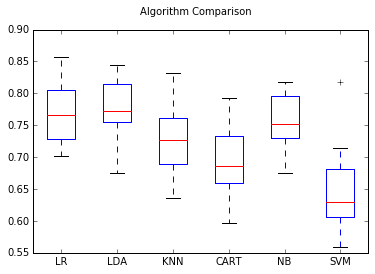

In [31]:
from matplotlib import pyplot

filename = 'pimaIndians.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [32]:
#LDA looks best...# highest score
# LR looks great.. slightly lower score.. but better in terms of having lower variation..

In [33]:
# R squared goodness of fit..
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)") % (results.mean(), results.std())

R^2: -0.554 (0.159)


In [34]:
# the value for R2 0 to 1.. for no fit to perfect fit.. the above then is not so good a fit... :(

## Spot check ML algoithms...
    Linear :
    Logistic Regression.
    Linear Discriminant Analysis.
    
    nonlinear machine learning algorithms:
     k-Nearest Neighbors.
     Naive Bayes.
     Classiffcation and Regression Trees.
     Support Vector Machines.
     
     Spot check is a way of discivering which algo perfoms best..

In [35]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.76951469583


In [36]:
# LDA
# linear discrimininant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.773462064252


In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Non LInear ML Classification algorithms
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.726555023923


In [38]:
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.696531100478


In [39]:
from sklearn.svm import SVC
kfold = KFold(n_splits=10, random_state=7)
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.651025290499


# Pipelines...
    minimize data leakage
    data prep and a modelling pipeline
    feature extraciton and modelling pipeline

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load data
filename = 'pimaIndians.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]


# create pipeline
estimators = [] # estimators.. placeholder array
estimators.append(('standardize', StandardScaler()))  # the purpose of this pipe.. to avoid leakage read below
estimators.append(('lda', LinearDiscriminantAnalysis())) # keep appending what you want to add into the pipeline
model = Pipeline(estimators)# casting..?

# evaluate pipeline

kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

# the issue of data leakage....
#Data preparation is one easy way to leak knowledge of the whole training dataset to the algorithm. 
#For example, preparing your data using normalization or standardization on the entire training dataset before learning would not
#be a valid test because the training dataset would have been influenced by the scale of the data in the test set

# Pipelines help you prevent data leakage in your test harness by ensuring that data preparation like standardization is constrained to 
# each fold of your cross validation procedure. as in this following step
# estimators.append(('standardize', StandardScaler())) 

0.773462064252


In [46]:
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# like the data pre.. standardization...
# feature extraction must be restricted to the batch in process..
# all the feature extraction and the feature union occurs
# within each fold of the cross validation procedure.
X = array[:,0:8]
Y = array[:,8]

# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.776042378674


## improve algorithms performance using ensembles..

    bagging ensemble methods such as bagged decision trees, random forest and extra trees.
        Bagging: build models of the same type usually from different subsamples of the training data
    boosting ensemble methods such as AdaBoost and stochastic gradient boosting.
        boosting: build models of the same type, usually, each model tries to fix the prediction errors of the prior type
    voting ensemble methods to combine the predictions from multiple algorithms.
        simple statistics (like calculating the mean) are used to combine predictions

In [47]:
# Bagged decision Trees
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
filename = 'pimaIndians.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.770745044429


In [48]:
# if it was just the CART...
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.690037593985


In [49]:
# much improvement..

In [50]:
# Random Forest Classification
# random forests ~= bagged decision trees
# Samples of the training dataset are taken with replacement, 
# but the trees are constructed in a way that reduces the correlation between individual classiffers

# rather than greedily choosing the best split point in the construction of each tree, only a random subset of features are considered for each split.

from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.774675324675


In [51]:
# and that is a marginal improvement .. 
# over the Bagged decision trees algorithm...

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
num_trees = 100
max_features = 7
kfold = KFold(n_splits=10, random_state=7)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.762918660287


In [53]:
# an extension of bagging where random trees are constructed from samples of the training dataset

### Boosting ensemble algorithms 
    creates a sequence of models that attempt to correct the mistakes
    of the models before them in the sequence.

In [54]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier
num_trees = 30
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.76045796309


In [55]:
# SGB ?GBM Stochastic gradient boosting... gradient boosting machines..
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.764285714286


In [ ]:
# a marginally better result than adaboost

In [56]:
# Voting Ensemble for Classification
 
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = KFold(n_splits=10, random_state=7)

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.738209159262


In [57]:
# Voting ensemble.. gives.. lower accuracy than the usual..


## improving algorithm performance using tuning..
    algorithm performance improvemen using parameter tuning
    grid search using tuning strat
    random search algorithm tuning strat

    Algorithm tuning aka  hyperparameter optimization where the algorithm parameters are referred to as hyperparameters, whereas the coecients found by the 
    machine learning algorithm itself are referred to as parameters.
    
    Sci kit learn  
    
    Grid Search Parameter Tuning.
    Random Search Parameter Tuning.

In [58]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
filename = 'pimaIndians.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# learning rates..? 
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.279617559313
1.0


In [59]:
# Grid search.. class was used for a one dimensional grid search..
# to find out the best parameter.. alpha.. for a ridge regression algorithm.. for this data set..

In [62]:
# Randomized for Algorithm Tuning
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,
random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)

print(rsearch.best_estimator_.alpha)

0.279617127031
0.977989511997


In [63]:
# sample algorithm parameters from a random distribution (i.e. uniform) for a fixed number of iterations.

In [64]:
#Running the example produces results much like those in the grid search example above. An optimal alpha value near 1.0 is discovered

## Saving and loading ML models for later use
    pickle
    joblib

In [66]:
from pickle import dump
from pickle import load

# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)

# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)

print(result)

0.755905511811


In [68]:
# Save job using JobLib

from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load

# observe  load and dump are different from the above..

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
dump(model, filename)
# some time later...
# load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

0.755905511811


    Manual Serialization. You might like to manually output the parameters of your
    learned model so that you can use them directly in scikit-learn or another platform in
    the future